In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  math import cos,sin,pi

In [291]:
data = pd.read_csv("Dataset_complete.csv")
data.tail()
data.drop('ranging_unit', axis=1, inplace=True)
data.drop('register_dump_CIR', axis=1, inplace=True)
data.drop('initiator', axis=1, inplace=True)
data.drop('protocol', axis=1, inplace=True)
data.drop('loc_initiator_z', axis=1, inplace=True)
data


,target,nlos_indicator,t1,t2,t3,t4,skew,tof,tof_skew,range,...,distance,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean
0,100,2.783982,946218857614,946490292658,946594234510,946322802711,-2.368804,1622,1745.608935,7.607739,...,7.962,0.000000,30.980000,30.220001,1654929794228,4,-80.136574,-80.077130,-79.836296,-80.016667
1,100,2.920485,1009474709646,1009746235572,1009850439822,1009578917162,-1.045965,1633,1687.497019,7.659333,...,7.962,0.000000,30.980000,29.840002,1654929795219,10,-80.267769,-79.988684,-79.835720,-80.030724
2,100,2.536090,1072923068046,1073194681670,1073299179662,1073027569304,-0.799856,1633,1674.791667,7.659333,...,7.962,0.000000,30.980000,29.840002,1654929796210,16,-79.964310,-79.850138,-79.693502,-79.835983
3,100,2.857669,36731534990,37003232943,37107270798,36835576116,-0.984438,1635,1686.709409,7.668714,...,7.962,0.000000,30.980000,29.840002,1654929797201,22,-80.040833,-79.818313,-79.849525,-79.902890
4,100,2.263103,99923195534,100194974620,100298828942,100027053147,-0.769092,1645,1685.436774,7.715617,...,7.962,0.000000,30.980000,29.840002,1654929798190,28,-79.999908,-80.102552,-80.022316,-80.041592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,184,3.075243,301428484750,302000434919,302102988430,301531040251,-9.382925,995,1476.125937,4.666893,...,7.000,6.999961,41.810001,46.939999,1654930833773,4231,-80.229179,-79.428015,-79.342829,-79.666674
3942,184,3.085177,375355600014,375928251294,376031194254,375458544956,-8.306196,991,1418.532184,4.648132,...,7.000,6.999961,41.525002,47.319996,1654930834930,4237,-80.196487,-79.576395,-79.985511,-79.919464
3943,184,2.674524,449294310542,449867663034,449970544782,449397194279,-8.952233,994,1455.010695,4.662203,...,7.000,6.999961,41.810001,46.939999,1654930836088,4243,-80.158638,-79.435472,-79.234453,-79.609521
3944,184,2.727551,523279420046,523853474064,523955982478,523381930458,-8.490778,999,1434.188082,4.685655,...,7.000,6.999961,41.240002,46.559998,1654930837246,4249,-80.229492,-79.554364,-79.599858,-79.794571


## <center> liste des captures constantes </center>

In [281]:
data["target"].unique()

array([100, 101, 150, 171, 180, 184])

In [307]:
def changeRepaire(dff,repaire) :
    df=dff.copy()
    x = list(df.loc_target_x[df["target"]==repaire])[0]
    y = list(df.loc_target_y[df["target"]==repaire])[0]
    for index, row in df.iterrows():
        if(row["target"]==repaire):
            df.at[index,"loc_target_x"] =0
            df.at[index,"loc_target_y"]=0
        df.at[index,"loc_initiator_x"] = df.at[index,"loc_initiator_x"] -x
        df.at[index,"loc_initiator_y"]= df.at[index,"loc_initiator_y"] -y
        df.at[index,"loc_target_x "]= df.at[index,"loc_target_x"] -x
        df.at[index,"loc_target_y "]= df.at[index,"loc_target_y"] -y
    return df

In [282]:
def changeRepairePosition(dff,repaire) :
    df=dff.copy()
    x = list(df.x[df["node_id"]==repaire])[0]
    y = list(df.y[df["node_id"]==repaire])[0]
    for index, row in df.iterrows():
        if(row["node_id"]==repaire):
             df.at[index,"x"] =0
             df.at[index,"y"]=0
        df.at[index,"x"]= df.at[index,"x"] -x
        df.at[index,"y"]= df.at[index,"y"] -y
    return df

In [283]:
def rotation(df, angle):
    df_c = df.copy()
    angle_rad = angle * pi / 180
    for index, row in df.iterrows():
        df.at[index,"loc_initiator_x"] = df_c.at[index,"loc_initiator_x"] * cos(angle_rad) - df_c.at[index,"loc_initiator_y"] * sin(angle_rad)
        df.at[index,"loc_initiator_y"] = df_c.at[index,"loc_initiator_x"] * cos(angle_rad) + df_c.at[index,"loc_initiator_y"] * sin(angle_rad)
        df.at[index,"loc_target_x"]=  df_c.at[index,"loc_target_x"] * cos(angle_rad) - df_c.at[index,"loc_target_y"] * sin(angle_rad)
        df.at[index,"loc_target_y"] = df_c.at[index,"loc_target_x"] * cos(angle_rad) + df_c.at[index,"loc_target_y"] * sin(angle_rad)
        print(df.at[index,"loc_target_y"])
    return df

In [284]:
def rotationPosition(df, angle):
    df_c = df.copy()
    angle_rad = angle * pi / 180
    df.x = df_c.x * cos(angle_rad) - df_c.y * sin(angle_rad)
    df.y = df_c.x * cos(angle_rad) + df_c.y * sin(angle_rad)
    return df

In [285]:
position=pd.read_csv("positions.csv")

In [253]:
def plotTrajet(df,position) :
    fig, ax = plt.subplots()
    ax.plot(list(-df['loc_initiator_x']),list(-df['loc_initiator_y']),label='emetteur')
    ax.set_title("Trajet de l'emetteur")
    plt.xlabel('abscisse')
    plt.ylabel('ordonné')
    plt.plot([0],[0],"^b",label='origine')
    plt.plot(-position['x'],-position['y'],"^r",label='capteur')
    plt.legend()
    plt.show()

In [305]:
data_test = data.copy()
position_test =position.copy()
data_test[["loc_initiator_x","loc_initiator_y","loc_target_x","loc_target_y"]].head()

,loc_initiator_x,loc_initiator_y,loc_target_x,loc_target_y
0,2.12,2.793,-3.962,7.931
1,2.12,2.793,-3.962,7.931
2,2.12,2.793,-3.962,7.931
3,2.12,2.793,-3.962,7.931
4,2.12,2.793,-3.962,7.931


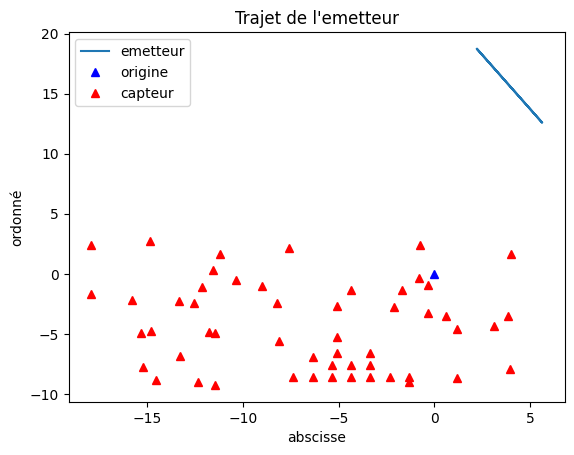

In [303]:
plotTrajet(d1,changeRepairePosition(position,100))

In [211]:
data_test=changeRepaire(data_test,100)
position_test = changeRepairePosition(position,100)

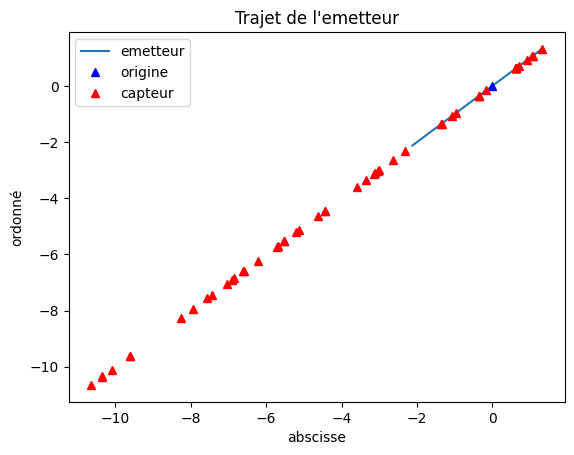

In [219]:

plotTrajet(data_test,position_test)

In [288]:
data_test = rotation(data_test,180)
position_test= rotationPosition(position_test,180)


3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.962000000000001
3.96200000

In [289]:
data_test[["loc_initiator_x","loc_initiator_y","loc_target_x","loc_target_y"]].head()

,loc_initiator_x,loc_initiator_y,loc_target_x,loc_target_y
0,-2.12,-2.12,3.962,3.962
1,-2.12,-2.12,3.962,3.962
2,-2.12,-2.12,3.962,3.962
3,-2.12,-2.12,3.962,3.962
4,-2.12,-2.12,3.962,3.962


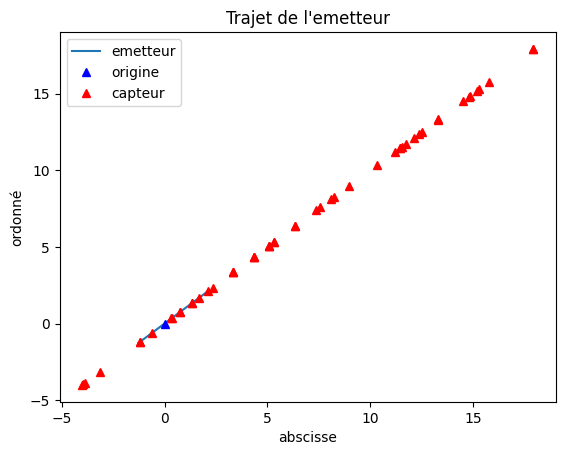

In [290]:
plotTrajet(data_test,position_test)

In [295]:
data["repaire"]=[0 for i in range(len(data))]
data_repaire_100 = data.copy() 

In [304]:
d1=changeRepaire(data_repaire_100,100)
d1["repaire"]=100
data_repaire_100 = data.copy() 
d2=changeRepaire(data_repaire_100,101)
d2["repaire"]=101
data_repaire_100 = data.copy() 
d3=changeRepaire(data_repaire_100,150)
d3["repaire"]=150





In [299]:
csv=pd.concat([d1,d2,d3],ignore_index=True)
len(csv)

11838

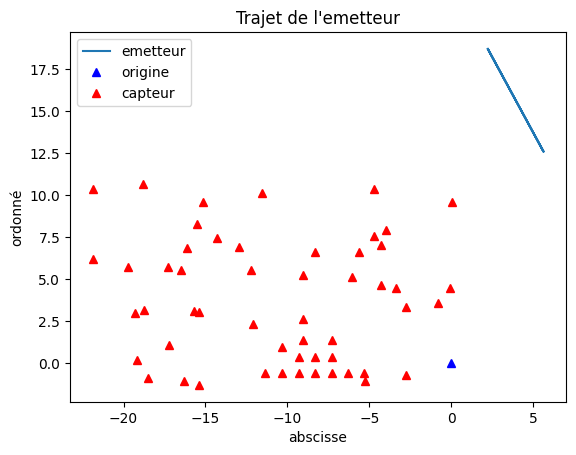

In [306]:
plotTrajet(d1,changeRepairePosition(position,100))